In [199]:
import numpy as np
import sympy as smp
from scipy.integrate import odeint
from sympy.solvers.solveset import linsolve, nonlinsolve
import matplotlib.pyplot as plt
import os
print(os.getcwd())  # Print the current working directory
print(os.listdir()) # List all files in the current directory


a:\uni\masters nu\RA\pythonCode\rnea
['double3Dpendthetas.npy', 'Figure_1.png', 'Figure_1_success.png', 'Figure_2.png', 'LE_Double_Wolf.nb', 'LE_matlab.m', 'LE_wolfram.nb', 'NE_matlab.m', 'planarDoublePendulum.ipynb', 'rnea.py', 'rnea_old.py', 'rnea_single_link _simplesty.py', 'rnea_single_link.py', 'rnea_single_sym.ipynb', 'simplePendLE.mat']


In [200]:
t, g = smp.symbols('t g')
m1, m2 = smp.symbols('m1 m2')
L1, L2 = smp.symbols('L1, L2')
x = smp.symbols('x')

In [201]:
the1, the2= smp.symbols(r'\theta_1, \theta_2 ', cls=smp.Function)

In [202]:
the1 = the1(t)
the2 = the2(t)


In [203]:
the1_d = smp.diff(the1, t)
the2_d = smp.diff(the2, t)
the1_dd = smp.diff(the1_d, t)
the2_dd = smp.diff(the2_d, t)

In [204]:
x1 = L1*smp.sin(the1)
y1 = -L1*smp.cos(the1)
x2 = x1 + L2*smp.sin(the2)
y2 = y1 - L2*smp.cos(the2)

In [205]:
# Kinetic
T1 = 0.5 * m1 * (smp.diff(x1, t)**2 + smp.diff(y1, t)**2)
T2 = 0.5 * m2 * (smp.diff(x2, t)**2 + smp.diff(y2, t)**2)
T = T1+T2
# Potential
V1 = m1*g*y1
V2 = m2*g*y2
V = V1 + V2
# Lagrangian
L = T-V
L


L1*g*m1*cos(\theta_1(t)) - g*m2*(-L1*cos(\theta_1(t)) - L2*cos(\theta_2(t))) + 0.5*m1*(L1**2*sin(\theta_1(t))**2*Derivative(\theta_1(t), t)**2 + L1**2*cos(\theta_1(t))**2*Derivative(\theta_1(t), t)**2) + 0.5*m2*((L1*sin(\theta_1(t))*Derivative(\theta_1(t), t) + L2*sin(\theta_2(t))*Derivative(\theta_2(t), t))**2 + (L1*cos(\theta_1(t))*Derivative(\theta_1(t), t) + L2*cos(\theta_2(t))*Derivative(\theta_2(t), t))**2)

In [206]:
LE1 = smp.diff(smp.diff(L, the1_d), t) - smp.diff(L, the1).simplify()
LE2 = smp.diff(smp.diff(L, the2_d), t) - smp.diff(L, the2).simplify()
tau1 = 2 * smp.sin(0.5 * t)
tau2 = 1.5 * smp.cos(1.5 * t)


In [207]:
sols = smp.solve([LE1 - tau1, LE2 - tau2], (the1_dd, the2_dd),
                simplify=False, rational=False)

In [208]:
x = smp.Matrix([[the1], [the1_d]])
x_dot = smp.diff(x, t)
x_dot
the1_d
smp.Eq(x_dot, smp.Matrix([[the1_d], [sols[the1_dd]]]))  

Eq(Matrix([
[     Derivative(\theta_1(t), t)],
[Derivative(\theta_1(t), (t, 2))]]), Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [209]:
dz1dt_f = smp.lambdify((t,g,m1,m2,L1,L2,the1,the2,the1_d,the2_d), sols[the1_dd])
dz2dt_f = smp.lambdify((t,g,m1,m2,L1,L2,the1,the2,the1_d,the2_d), sols[the2_dd])
dthe1dt_f = smp.lambdify(the1_d, the1_d)        
dthe2dt_f = smp.lambdify(the2_d, the2_d)



In [210]:
def dSdt(S, t, g, m1, m2, L1, L2):
    the1, z1, the2, z2 = S
    return [
        dthe1dt_f(z1),
        dz1dt_f(t, g, m1, m2, L1, L2, the1, the2, z1, z2),
        dthe2dt_f(z2),
        dz2dt_f(t, g, m1, m2, L1, L2, the1, the2, z1, z2),
    ]



In [211]:
tend = 10
t = np.linspace(0, tend, 1000)
g = 9.81
m1 = 1
m2 = 1
L1 = 1
L2 = 1

ans = odeint(dSdt, y0=[0*np.pi/180, 0, 0*np.pi/180, 0], t=t, args=(g,m1,m2,L1,L2))


In [212]:
# ans2 = odeint(dSdt, y0=[np.pi/3, np.pi/3, 0, -np.pi, 0, 0, -2, -10], t=t, args=(g,m1,m2,L1,L2))

In [213]:
# ans3 = odeint(dSdt, y0=[np.pi/3, np.pi/3, 0, -np.pi, 3, 10, 0, 0], t=t, args=(g,m1,m2,L1,L2))

In [214]:
ans.shape
theta1 = ans.T[0]
theta2 = ans.T[2]

theta1_d = ans.T[1]
theta2_d = ans.T[3]

theta1_dd = []
theta2_dd = []
theta1_dd.append(dz1dt_f(t, g, m1, m2, L1, L2, theta1, theta2, theta1_d, theta2_d))
theta2_dd.append(dz2dt_f(t, g, m1, m2, L1, L2, theta1, theta2, theta1_d, theta2_d))

theta1_dd = np.reshape(theta1_dd, (1000,))
theta2_dd = np.reshape(theta2_dd, (1000,))

np.save('../data/planarDoublePend.npy', np.array([theta1, theta2, theta1_d, theta2_d, theta1_dd, theta2_dd]))

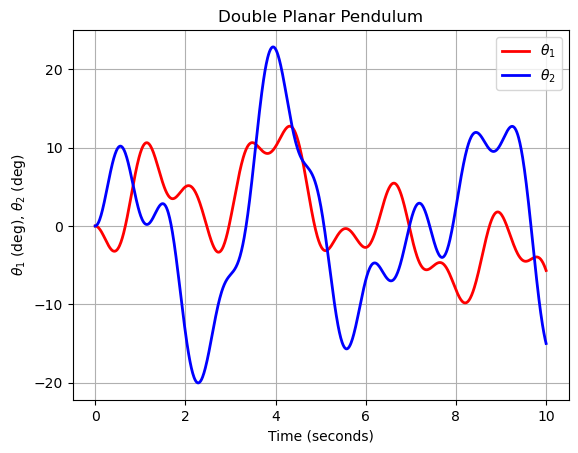

-1.4675564011380746

In [215]:
plt.plot(t,  ans.T[0]*180/np.pi, 'r', lw=2, label=r'$\theta_1$')
plt.plot(t, ans.T[2]*180/np.pi, 'b', lw=2, label=r'$\theta_2$') 
plt.title('Double Planar Pendulum')
plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel(r'$\theta_1$ (deg), $\theta_2$ (deg)')
plt.grid()
plt.show()
theta1_dd[2]

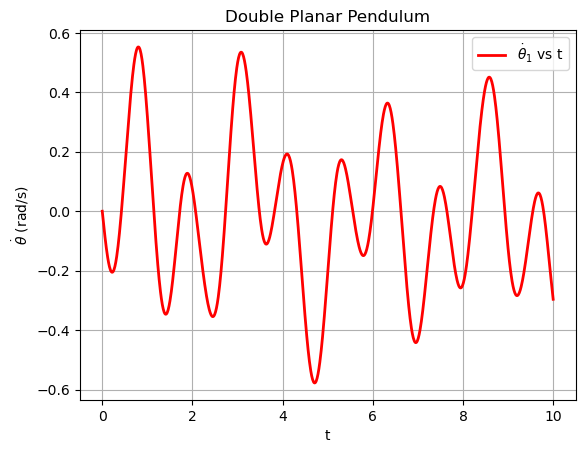

In [216]:
plt.plot(t,  theta1_d, 'r', lw=2, label=r'$\dot \theta_1$ vs t')
plt.title('Double Planar Pendulum')
plt.legend()
plt.xlabel(r't')
plt.ylabel(r'$\dot \theta$ (rad/s)')
plt.grid()
plt.show()

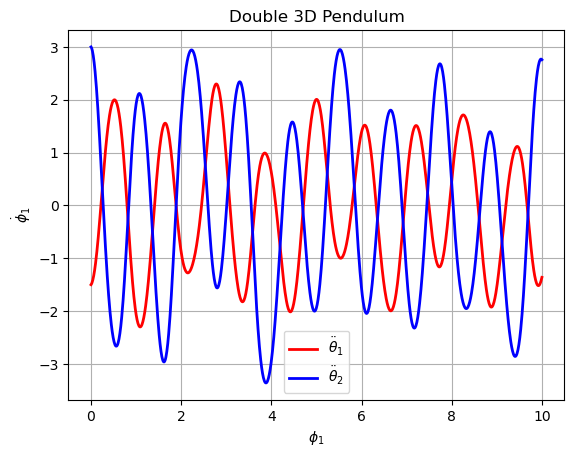

In [217]:
plt.plot( t, theta1_dd, 'r', lw=2, label=r'$\ddot \theta_1$')
plt.plot( t, theta2_dd, 'b', lw=2, label=r'$\ddot \theta_2$')
plt.title('Double 3D Pendulum')
plt.legend()
plt.xlabel(r'$\phi_1$')
plt.ylabel(r'$\dot \phi_1$')
plt.grid()
plt.show()

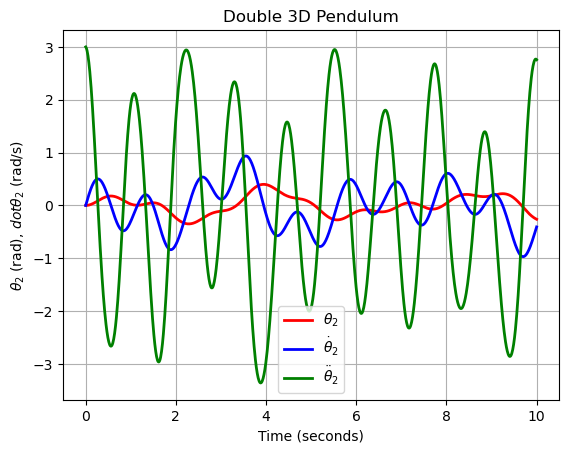

In [218]:
plt.plot(t,  theta2, 'r', lw=2, label=r'$\theta_2$')
plt.plot(t, theta2_d, 'b', lw=2, label=r'$\dot \theta_2$') 
plt.plot(t, theta2_dd, 'g', lw=2, label=r'$\ddot \theta_2$') 
plt.title('Double 3D Pendulum')
plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel(r'$\theta_2$ (rad), $dot \theta_2$ (rad/s)')
plt.grid()
plt.show()

In [219]:
def get_pos(the1, the2, phi1, phi2, L1, L2):
    return (x1_f(the1, the2, phi1, phi2, L1, L2),
            y1_f(the1, the2, phi1, phi2, L1, L2),
            z1_f(the1, the2, phi1, phi2, L1, L2),
            x2_f(the1, the2, phi1, phi2, L1, L2),
            y2_f(the1, the2, phi1, phi2, L1, L2),
            z2_f(the1, the2, phi1, phi2, L1, L2))

x1, y1, z1, x2, y2, z2 = get_pos(ans.T[0], ans.T[1], ans.T[2], ans.T[3], L1, L2)
np.save('./data/double3Dpen', np.array([x1,y1,z1,x2,y2,z2]))

NameError: name 'x1_f' is not defined

In [ ]:
# x1, y1, z1, x2, y2, z2 = get_pos(ans2.T[0], ans2.T[1], ans2.T[2], ans2.T[3], L1, L2)
# np.save('./data/double3Dpen2', np.array([x1,y1,z1,x2,y2,z2]))

In [ ]:
# x1, y1, z1, x2, y2, z2 = get_pos(ans3.T[0], ans3.T[1], ans3.T[2], ans3.T[3], L1, L2)
# np.save('./data/double3Dpen3', np.array([x1,y1,z1,x2,y2,z2]))

In [ ]:
x1

array([ 2.        ,  1.99999753,  1.99999011, ..., -1.30477694,
        1.29438463, -1.33616819])